# Embedding dimension selection for LPP text

In [2]:
import pandas as pd
import os, logging, gensim
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.signal import savgol_filter
import numpy as np

In [3]:
# LaTeX configure
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif':['Palatino']})

In [2]:
# sim_emb = pd.read_csv('./Decorrelation/French_POS/sim_56k_634d.txt', sep=' ', header=None, skiprows=1, index_col=0)
asn_emb = pd.read_csv('./Decorrelation/French_POS/asn_embedding_24519.txt', sep=' ', header=None, skiprows=1, index_col=0)

In [3]:
vocabulary = pd.concat([pd.read_csv('./TextFineTuning/LPP Onset/Context Lemma Onsets/' + str(i) + '_onset_wolf.csv') for i in range(1,10)], ignore_index=True)
vocabulary = set(vocabulary.word.to_list())

In [24]:
sim_emb_red = sim_emb.loc[sim_emb.index.isin(vocabulary)]
asn_emb_red = asn_emb.loc[asn_emb.index.isin(vocabulary)]

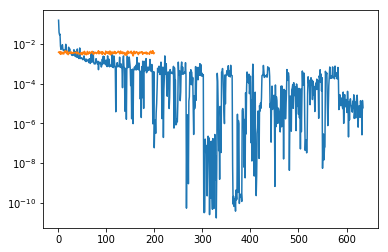

In [31]:
plt.yscale('log')
plt.plot(sim_emb_red.var())


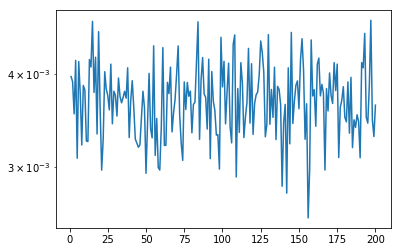

In [33]:
plt.yscale('log')
plt.plot(asn_emb_red.var())

In [5]:
regressors = [pd.read_csv('/home/sying/Documents/LePetitPrince_Pallier2018/lpp-scripts-reorg/models/fr/sim634/design_matrices/dmtx_{}.csv'.format(i)) for i in range(1, 10)]
reg_var = pd.DataFrame([regressors[i].var() for i in range(0, 9)])

In [6]:
regressors_ortho = [pd.read_csv('/home/sying/Documents/LePetitPrince_Pallier2018/lpp-scripts-reorg/models/fr/sim634/design_matrices/dmtx_{}_ortho.csv'.format(i)) for i in range(1, 10)]

In [7]:
reg_ortho_var = pd.DataFrame([regressors_ortho[i].var() for i in range(0, 9)])

In [13]:
reg_var.mean()

sim_dim634_voc56665_d1      1.197509e-03
sim_dim634_voc56665_d2      2.657264e-04
sim_dim634_voc56665_d3      2.085403e-04
sim_dim634_voc56665_d4      5.258333e-04
sim_dim634_voc56665_d5      8.748210e-05
sim_dim634_voc56665_d6      4.046729e-05
sim_dim634_voc56665_d7      3.364280e-05
sim_dim634_voc56665_d8      6.436474e-05
sim_dim634_voc56665_d9      6.984765e-05
sim_dim634_voc56665_d10     5.136509e-05
sim_dim634_voc56665_d11     4.021427e-05
sim_dim634_voc56665_d12     3.714189e-05
sim_dim634_voc56665_d13     4.095999e-05
sim_dim634_voc56665_d14     3.344428e-05
sim_dim634_voc56665_d15     3.248545e-05
sim_dim634_voc56665_d16     1.149034e-04
sim_dim634_voc56665_d17     3.834894e-05
sim_dim634_voc56665_d18     2.909782e-05
sim_dim634_voc56665_d19     3.976721e-05
sim_dim634_voc56665_d20     2.427098e-05
sim_dim634_voc56665_d21     2.437355e-05
sim_dim634_voc56665_d22     5.800369e-05
sim_dim634_voc56665_d23     2.746867e-05
sim_dim634_voc56665_d24     6.449632e-05
sim_dim634_voc56

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.

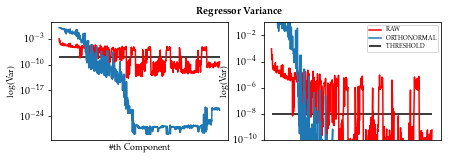

In [25]:
f, ax = plt.subplots(1,2,figsize=(3.49 * 2, 2.16))

threshold = 1e-8
ax[0].set_xticks([])
ax[0].set_yscale('log')
ax[0].plot(reg_var.min(), c='r', label='RAW')
ax[0].plot(reg_ortho_var.min(), label='ORTHONORMAL')
ax[0].hlines(xmin=0, xmax=635, y = 1e-8, label='THRESHOLD')
plt.suptitle(r'\textbf{Regressor Variance}', fontsize=10)
ax[0].set_xlabel(r'\#th Component', fontsize=9)
ax[0].set_ylabel(r'log(Var)', fontsize=9)

ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_ylim(1e-10, 1e-1)
ax[1].plot(reg_var.min(), c='r', label='RAW')
ax[1].plot(reg_ortho_var.min(), label='ORTHONORMAL')
ax[1].hlines(xmin=0, xmax=635, y = 1e-8, label='THRESHOLD')
ax[1].set_ylabel(r'log(Var)', fontsize=9)
ax[1].legend(prop={'size': 6})

plt.show()

f.savefig("SimDimensionSelectionRegLPP.pdf", bbox_inches='tight')

In [18]:
for i in range(-10, -2):
    threshold = 10 ** i
    print(i, (reg_ortho_var.min() > threshold).sum())

-10 145
-9 129
-8 122
-7 114
-6 110
-5 103
-4 88
-3 72


In [22]:
threshold = 10 ** -5
' '.join(reg_ortho_var.min().loc[reg_ortho_var.min() > threshold].index)

'rms wrate cwrate sim_dim634_voc56665_d1 sim_dim634_voc56665_d2 sim_dim634_voc56665_d3 sim_dim634_voc56665_d4 sim_dim634_voc56665_d5 sim_dim634_voc56665_d6 sim_dim634_voc56665_d7 sim_dim634_voc56665_d8 sim_dim634_voc56665_d9 sim_dim634_voc56665_d10 sim_dim634_voc56665_d11 sim_dim634_voc56665_d12 sim_dim634_voc56665_d13 sim_dim634_voc56665_d14 sim_dim634_voc56665_d15 sim_dim634_voc56665_d16 sim_dim634_voc56665_d17 sim_dim634_voc56665_d18 sim_dim634_voc56665_d19 sim_dim634_voc56665_d20 sim_dim634_voc56665_d21 sim_dim634_voc56665_d22 sim_dim634_voc56665_d23 sim_dim634_voc56665_d24 sim_dim634_voc56665_d25 sim_dim634_voc56665_d26 sim_dim634_voc56665_d27 sim_dim634_voc56665_d28 sim_dim634_voc56665_d29 sim_dim634_voc56665_d30 sim_dim634_voc56665_d31 sim_dim634_voc56665_d32 sim_dim634_voc56665_d33 sim_dim634_voc56665_d34 sim_dim634_voc56665_d35 sim_dim634_voc56665_d36 sim_dim634_voc56665_d37 sim_dim634_voc56665_d38 sim_dim634_voc56665_d39 sim_dim634_voc56665_d40 sim_dim634_voc56665_d41 sim_dim

# Nearest Neighbours of LPP Vocabulary

In [88]:
root_path = '/home/sying/Documents/Decorrelation/French_POS/'
model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'asn_embedding_24519.txt', binary=False)

In [ ]:
vocabulary = pd.concat([pd.read_csv('./TextFineTuning/LPP Onset/Context Lemma Onsets/' + str(i) + '_onset_wolf.csv') for i in range(1,10)], ignore_index=True)
vocabulary = set(vocabulary.word.to_list())

In [89]:
query_result = np.array([model.similar_by_word(word, topn=10) for word in vocabulary if word in model.vocab])
query_index = [word for word in vocabulary if word in model.vocab]
query_result = query_result.reshape((len(query_index), -1))
query_df1 = pd.DataFrame(query_result, index=query_index)
query_df1.to_csv('lpp_neighbours_in_asn200.csv')

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [90]:
model.vectors = model.vectors[:, :30]
model.vectors_norm = None
model.vector_size = 30
query_result = np.array([model.similar_by_word(word, topn=10) for word in vocabulary if word in model.vocab])
query_result = query_result.reshape((len(query_index), -1))
query_df2 = pd.DataFrame(query_result, index=query_index)
query_df2.to_csv('lpp_neighbours_in_asn30.csv')

In [91]:
model.vectors = model.vectors[:, :13]
model.vectors_norm = None
model.vector_size = 13
query_result = np.array([model.similar_by_word(word, topn=10) for word in vocabulary if word in model.vocab])
query_result = query_result.reshape((len(query_index), -1))
query_df3 = pd.DataFrame(query_result, index=query_index)
query_df3.to_csv('lpp_neighbours_in_asn13.csv')

In [92]:
query_df1.loc[:, 'dim'] = 200
query_df2.loc[:, 'dim'] = 30
query_df3.loc[:, 'dim'] = 13
query_df4 = query_df3.copy()

In [130]:
model_sim = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sim_56k_634d.txt', binary=False)
# Dimension selected in LPP 
reg_str = "sim_dim634_voc56665_d1 sim_dim634_voc56665_d2 sim_dim634_voc56665_d3 sim_dim634_voc56665_d4 sim_dim634_voc56665_d5 sim_dim634_voc56665_d6 sim_dim634_voc56665_d7 sim_dim634_voc56665_d8 sim_dim634_voc56665_d9 sim_dim634_voc56665_d10 sim_dim634_voc56665_d11 sim_dim634_voc56665_d12 sim_dim634_voc56665_d13 sim_dim634_voc56665_d14 sim_dim634_voc56665_d15 sim_dim634_voc56665_d16 sim_dim634_voc56665_d17 sim_dim634_voc56665_d18 sim_dim634_voc56665_d19 sim_dim634_voc56665_d20 sim_dim634_voc56665_d21 sim_dim634_voc56665_d22 sim_dim634_voc56665_d23 sim_dim634_voc56665_d24 sim_dim634_voc56665_d25 sim_dim634_voc56665_d26 sim_dim634_voc56665_d27 sim_dim634_voc56665_d28 sim_dim634_voc56665_d29 sim_dim634_voc56665_d30 sim_dim634_voc56665_d31 sim_dim634_voc56665_d32 sim_dim634_voc56665_d33 sim_dim634_voc56665_d34 sim_dim634_voc56665_d35 sim_dim634_voc56665_d36 sim_dim634_voc56665_d37 sim_dim634_voc56665_d38 sim_dim634_voc56665_d39 sim_dim634_voc56665_d40 sim_dim634_voc56665_d41 sim_dim634_voc56665_d42 sim_dim634_voc56665_d43 sim_dim634_voc56665_d44 sim_dim634_voc56665_d45 sim_dim634_voc56665_d46 sim_dim634_voc56665_d47 sim_dim634_voc56665_d48 sim_dim634_voc56665_d49 sim_dim634_voc56665_d50 sim_dim634_voc56665_d51 sim_dim634_voc56665_d52 sim_dim634_voc56665_d53 sim_dim634_voc56665_d54 sim_dim634_voc56665_d55 sim_dim634_voc56665_d56 sim_dim634_voc56665_d57 sim_dim634_voc56665_d58 sim_dim634_voc56665_d59 sim_dim634_voc56665_d60 sim_dim634_voc56665_d61 sim_dim634_voc56665_d62 sim_dim634_voc56665_d63 sim_dim634_voc56665_d64 sim_dim634_voc56665_d65 sim_dim634_voc56665_d66 sim_dim634_voc56665_d67 sim_dim634_voc56665_d68 sim_dim634_voc56665_d69 sim_dim634_voc56665_d70 sim_dim634_voc56665_d71 sim_dim634_voc56665_d72 sim_dim634_voc56665_d73 sim_dim634_voc56665_d74 sim_dim634_voc56665_d75 sim_dim634_voc56665_d76 sim_dim634_voc56665_d77 sim_dim634_voc56665_d78 sim_dim634_voc56665_d79 sim_dim634_voc56665_d80 sim_dim634_voc56665_d81 sim_dim634_voc56665_d82 sim_dim634_voc56665_d83 sim_dim634_voc56665_d84 sim_dim634_voc56665_d85 sim_dim634_voc56665_d87 sim_dim634_voc56665_d88 sim_dim634_voc56665_d89 sim_dim634_voc56665_d90 sim_dim634_voc56665_d91 sim_dim634_voc56665_d92 sim_dim634_voc56665_d93 sim_dim634_voc56665_d94 sim_dim634_voc56665_d96 sim_dim634_voc56665_d97 sim_dim634_voc56665_d99 sim_dim634_voc56665_d100 sim_dim634_voc56665_d103 sim_dim634_voc56665_d117 sim_dim634_voc56665_d131"
regs = reg_str.split()
dims = []
for reg in regs:
    dims.append(int(reg.rsplit('_d')[2]))
    
dims = np.array(dims)
model_sim.vectors = model_sim.vectors[:, dims]
#model.vectors_norm = model.vectors_norm[:, :dims]
model_sim.vector_size = len(dims)

In [138]:
def fill_sim_scores(row):
    scores = model_sim.distances(row.name, list(row[0:20:2]))
    row[1:21:2] = scores
    return row

In [139]:
query_df4 = query_df3.copy()

In [141]:
query_df4 = query_df4.apply(fill_sim_scores, axis=1)

In [146]:
query_df4.loc[:, 'dim'] = 'sim100'

In [148]:
query_all = pd.concat([query_df1, query_df2, query_df3, query_df4])
query_all.loc[:, 'dim'] = query_all.loc[:, 'dim'].astype('str')

In [162]:
query_all = query_all[new_columns]
query_all.sort_values('dim', inplace=True)
query_all.sort_index(inplace=True)

In [155]:
new_columns = ['dim'] + list(query_all.columns[:-1])

In [164]:
query_all.to_csv('lpp_in_asn_with_ref_sim.csv')

In [1]:
"sim_dim634_voc56665_d1 sim_dim634_voc56665_d2 sim_dim634_voc56665_d3 sim_dim634_voc56665_d4 sim_dim634_voc56665_d5 sim_dim634_voc56665_d6 sim_dim634_voc56665_d7 sim_dim634_voc56665_d8 sim_dim634_voc56665_d9 sim_dim634_voc56665_d10 sim_dim634_voc56665_d11 sim_dim634_voc56665_d12 sim_dim634_voc56665_d13 sim_dim634_voc56665_d14 sim_dim634_voc56665_d15 sim_dim634_voc56665_d16 sim_dim634_voc56665_d17 sim_dim634_voc56665_d18 sim_dim634_voc56665_d19 sim_dim634_voc56665_d20 sim_dim634_voc56665_d21 sim_dim634_voc56665_d22 sim_dim634_voc56665_d23 sim_dim634_voc56665_d24 sim_dim634_voc56665_d25 sim_dim634_voc56665_d26 sim_dim634_voc56665_d27 sim_dim634_voc56665_d28 sim_dim634_voc56665_d29 sim_dim634_voc56665_d30 sim_dim634_voc56665_d31 sim_dim634_voc56665_d32 sim_dim634_voc56665_d33 sim_dim634_voc56665_d34 sim_dim634_voc56665_d35 sim_dim634_voc56665_d36 sim_dim634_voc56665_d37 sim_dim634_voc56665_d38 sim_dim634_voc56665_d39 sim_dim634_voc56665_d40 sim_dim634_voc56665_d41 sim_dim634_voc56665_d42 sim_dim634_voc56665_d43 sim_dim634_voc56665_d44 sim_dim634_voc56665_d45 sim_dim634_voc56665_d46 sim_dim634_voc56665_d47 sim_dim634_voc56665_d48 sim_dim634_voc56665_d49 sim_dim634_voc56665_d50 sim_dim634_voc56665_d51 sim_dim634_voc56665_d52 sim_dim634_voc56665_d53 sim_dim634_voc56665_d54 sim_dim634_voc56665_d55 sim_dim634_voc56665_d56 sim_dim634_voc56665_d57 sim_dim634_voc56665_d58 sim_dim634_voc56665_d59 sim_dim634_voc56665_d60 sim_dim634_voc56665_d61 sim_dim634_voc56665_d62 sim_dim634_voc56665_d63 sim_dim634_voc56665_d64 sim_dim634_voc56665_d65 sim_dim634_voc56665_d66 sim_dim634_voc56665_d67 sim_dim634_voc56665_d68 sim_dim634_voc56665_d69 sim_dim634_voc56665_d70 sim_dim634_voc56665_d71 sim_dim634_voc56665_d72 sim_dim634_voc56665_d73 sim_dim634_voc56665_d74 sim_dim634_voc56665_d75 sim_dim634_voc56665_d76 sim_dim634_voc56665_d77 sim_dim634_voc56665_d78 sim_dim634_voc56665_d79 sim_dim634_voc56665_d80 sim_dim634_voc56665_d81 sim_dim634_voc56665_d82 sim_dim634_voc56665_d83 sim_dim634_voc56665_d84 sim_dim634_voc56665_d85 sim_dim634_voc56665_d87 sim_dim634_voc56665_d88 sim_dim634_voc56665_d89 sim_dim634_voc56665_d90 sim_dim634_voc56665_d91 sim_dim634_voc56665_d92 sim_dim634_voc56665_d93 sim_dim634_voc56665_d94 sim_dim634_voc56665_d96 sim_dim634_voc56665_d97 sim_dim634_voc56665_d99 sim_dim634_voc56665_d100 sim_dim634_voc56665_d103 sim_dim634_voc56665_d117 sim_dim634_voc56665_d131".split()

['sim_dim634_voc56665_d1',
 'sim_dim634_voc56665_d2',
 'sim_dim634_voc56665_d3',
 'sim_dim634_voc56665_d4',
 'sim_dim634_voc56665_d5',
 'sim_dim634_voc56665_d6',
 'sim_dim634_voc56665_d7',
 'sim_dim634_voc56665_d8',
 'sim_dim634_voc56665_d9',
 'sim_dim634_voc56665_d10',
 'sim_dim634_voc56665_d11',
 'sim_dim634_voc56665_d12',
 'sim_dim634_voc56665_d13',
 'sim_dim634_voc56665_d14',
 'sim_dim634_voc56665_d15',
 'sim_dim634_voc56665_d16',
 'sim_dim634_voc56665_d17',
 'sim_dim634_voc56665_d18',
 'sim_dim634_voc56665_d19',
 'sim_dim634_voc56665_d20',
 'sim_dim634_voc56665_d21',
 'sim_dim634_voc56665_d22',
 'sim_dim634_voc56665_d23',
 'sim_dim634_voc56665_d24',
 'sim_dim634_voc56665_d25',
 'sim_dim634_voc56665_d26',
 'sim_dim634_voc56665_d27',
 'sim_dim634_voc56665_d28',
 'sim_dim634_voc56665_d29',
 'sim_dim634_voc56665_d30',
 'sim_dim634_voc56665_d31',
 'sim_dim634_voc56665_d32',
 'sim_dim634_voc56665_d33',
 'sim_dim634_voc56665_d34',
 'sim_dim634_voc56665_d35',
 'sim_dim634_voc56665_d36',
 